# GeoPandas

[GeoPandas](http://geopandas.org/) es un proyecto de software libre que extiende los tipos de datos de [Pandas](http://pandas.pydata.org/) para incorporar objetos geométricos (puntos, líneas, polígonos, etc). GeoPandas se apoya en las bibliotecas [Shapely](https://pypi.org/project/Shapely/) para realizar las operaciones geométricas, [Fiona](https://github.com/Toblerity/Fiona) para acceder a los datos (ej. en archivos) y [Descartes](https://bitbucket.org/sgillies/descartes/src/default/) y [Matplotlib](https://matplotlib.org/) para graficación.

El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en el lenguaje Python, lo que se logra a través de la implementación de estructuras que permiten manejar simultáneamente grandes cantidades de datos. Las dos estructuras de datos principales de GeoPandas son:

- [GeoSeries](http://geopandas.org/data_structures.html#geoseries): es un vector en el que cada elemento es un conjunto de una o varias geometrías correspondientes a una observación. Por ejemplo, el polígono (o multipolígono) que representa una provincia.
- [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe): es una estructura tabular (i.e. con filas y columnas) de datos geométricos y no geométricos (ej. textos, números). El conjunto de geometrías se implementa a través de GeoSeries.

Con estas estructuras, es posible realizar desde Python operaciones "masivas" con datos que de otra forma requerirían de una base de datos geoespacial (ej. [PostGIS](https://postgis.net/)).

## Instalación

Para instalar el paquete mediante **conda**, debe ejecutarse la siguiente instrucción desde la línea de comandos de Anaconda:

```
conda install geopandas
```

## Importación

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

# Cantidad máxima de registros que se despliegan en un GeoDataFrame
pd.options.display.max_rows = 10

## Ejemplos

Para los siguientes ejemplos, se utilizará el _shapefile_ de países de [Natural Earth](https://www.naturalearthdata.com/), disponible en [http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/). El enlace anterior brinda acceso a un archivo ZIP que debe colocarse en el directorio de datos (./data). Una vez hecho esto, se procede a almacenar los datos en un GeoDataFrame, a través de la función **read_file()**.

In [2]:
paises = geopandas.read_file("zip://./datos/ne_110m_admin_0_countries.zip")
# si se descomprimió el archivo:
# paises = geopandas.read_file("datos/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [3]:
# paises es una variable del tipo GeoDataFrame
type(paises)

geopandas.geodataframe.GeoDataFrame

### Visualización de datos tabulares

Los datos de un GeoDataFrame pueden inspeccionarse con la función **head()**, la cual retorna los primeros registros de un GeoDataFrame. Nótese la columna con el tipo de datos geométricos.

In [4]:
paises.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,í¼ì§,Fiji,FidÅ¼i,Fiji,Ð¤Ð¸Ð´Ð¶Ð¸,Fiji,Fiji,Fiji,ææ¿,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,íìëì,Tanzania,Tanzania,TanzÃ¢nia,Ð¢Ð°Ð½Ð·Ð°Ð½Ð¸Ñ,Tanzania,Tanzanya,Tanzania,å¦æ¡å°¼äº,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,ìì¬íë¼,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,ÐÐ°Ð¿Ð°Ð´Ð½Ð°Ñ Ð¡Ð°Ñ Ð°ÑÐ°,VÃ¤stsahara,BatÄ± Sahra,TÃ¢y Sahara,è¥¿æåæ,POLYGON ((-8.665589565454809 27.65642588959236...
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,ìºëë¤,Canada,Kanada,CanadÃ¡,ÐÐ°Ð½Ð°Ð´Ð°,Kanada,Kanada,Canada,å æ¿å¤§,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,ë¯¸êµ­,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Ð¡Ð¾ÐµÐ´Ð¸Ð½ÑÐ½Ð½ÑÐµ Ð¨ÑÐ°ÑÑ ÐÐ¼ÐµÑÐ¸ÐºÐ¸,USA,Amerika BirleÅik Devletleri,Hoa Ká»³,ç¾å½,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [5]:
# Despliegue de las geometrías
paises.geometry

0      (POLYGON ((180 -16.06713266364245, 180 -16.555...
1      POLYGON ((33.90371119710453 -0.950000000000000...
2      POLYGON ((-8.665589565454809 27.65642588959236...
3      (POLYGON ((-122.84 49.00000000000011, -122.974...
4      (POLYGON ((-122.84 49.00000000000011, -120 49....
                             ...                        
172    POLYGON ((18.82982479287395 45.90887235802528,...
173    POLYGON ((20.07070000000004 42.58863000000008,...
174    POLYGON ((20.59024654668023 41.85540891928363,...
175    POLYGON ((-61.68000000000001 10.76, -61.105 10...
176    POLYGON ((30.83385242171543 3.509171604222463,...
Name: geometry, Length: 177, dtype: object

In [6]:
# Despliegue de la lista de columnas
paises.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [7]:
# Despliegue de un subconjunto de columnas
paises[['NAME_ES','CONTINENT','ECONOMY']]

,NAME_ES,CONTINENT,ECONOMY
0,Fiyi,Oceania,6. Developing region
1,Tanzania,Africa,7. Least developed region
2,Sahara Occidental,Africa,7. Least developed region
3,CanadÃ¡,North America,1. Developed region: G7
4,Estados Unidos,North America,1. Developed region: G7
...,...,...,...
172,Serbia,Europe,6. Developing region
173,Montenegro,Europe,6. Developing region
174,Kosovo,Europe,6. Developing region
175,Trinidad y Tobago,North America,6. Developing region


Funciones en columnas

In [8]:
# Promedio
paises['POP_EST'].mean()

41712369.84180791

In [9]:
# Máximo
paises['POP_EST'].max()

1379302771

In [10]:
# Mínimo
paises['POP_EST'].min()

140

Filtrado

In [11]:
paises[paises['CONTINENT'] == 'Africa']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,íìëì,Tanzania,Tanzania,TanzÃ¢nia,Ð¢Ð°Ð½Ð·Ð°Ð½Ð¸Ñ,Tanzania,Tanzanya,Tanzania,å¦æ¡å°¼äº,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,ìì¬íë¼,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,ÐÐ°Ð¿Ð°Ð´Ð½Ð°Ñ Ð¡Ð°Ñ Ð°ÑÐ°,VÃ¤stsahara,BatÄ± Sahra,TÃ¢y Sahara,è¥¿æåæ,POLYGON ((-8.665589565454809 27.65642588959236...
11,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,Democratic Republic of the Congo,COD,...,ì½©ê³ ë¯¼ì£¼ ê³µíêµ­,Congo-Kinshasa,Demokratyczna Republika Konga,RepÃºblica DemocrÃ¡tica do Congo,ÐÐµÐ¼Ð¾ÐºÑÐ°ÑÐ¸ÑÐµÑÐºÐ°Ñ Ð ÐµÑÐ¿ÑÐ±Ð»Ð...,Kongo-Kinshasa,Demokratik Kongo Cumhuriyeti,Cá»ng hÃ²a DÃ¢n chá»§ Congo,åææ°ä¸»å ±åå½,POLYGON ((29.33999759290035 -4.499983412294092...
12,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,Somalia,SOM,...,ìë§ë¦¬ì,SomaliÃ«,Somalia,SomÃ¡lia,Ð¡Ð¾Ð¼Ð°Ð»Ð¸,Somalia,Somali,Somalia,ç´¢é©¬é,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
13,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,Kenya,KEN,...,ì¼ë,Kenia,Kenia,QuÃ©nia,ÐÐµÐ½Ð¸Ñ,Kenya,Kenya,Kenya,è¯å°¼äº,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Admin-0 country,1,5,Djibouti,DJI,0,2,Sovereign country,Djibouti,DJI,...,ì§ë¶í°,Djibouti,DÅ¼ibuti,Djibouti,ÐÐ¶Ð¸Ð±ÑÑÐ¸,Djibouti,Cibuti,Djibouti,åå¸æ,"POLYGON ((42.35156000000012 12.54223000000013,..."
167,Admin-0 country,1,5,Somaliland,SOL,0,2,Indeterminate,Somaliland,SOL,...,ìë§ë¦´ëë,Somaliland,Somaliland,SomalilÃ¢ndia,Ð¡Ð¾Ð¼Ð°Ð»Ð¸Ð»ÐµÐ½Ð´,Somaliland,Somaliland,Somaliland,ç´¢é©¬éå °,"POLYGON ((48.94820475850985 11.41061728169797,..."
168,Admin-0 country,1,3,Uganda,UGA,0,2,Sovereign country,Uganda,UGA,...,ì°ê°ë¤,Oeganda,Uganda,Uganda,Ð£Ð³Ð°Ð½Ð´Ð°,Uganda,Uganda,Uganda,ä¹å¹²è¾¾,POLYGON ((33.90371119710453 -0.950000000000000...
169,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,Rwanda,RWA,...,ë¥´ìë¤,Rwanda,Rwanda,Ruanda,Ð ÑÐ°Ð½Ð´Ð°,Rwanda,Ruanda,Rwanda,å¢æºè¾¾,POLYGON ((30.41910485201925 -1.134659112150416...


In [12]:
paises[paises['POP_EST'] <= 100000]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
20,Admin-0 country,1,5,United Kingdom,GB1,1,2,Dependency,Falkland Islands,FLK,...,í¬í´ëë ì ë,Falklandeilanden,Falklandy,Ilhas Malvinas,Ð¤Ð¾Ð»ÐºÐ»ÐµÐ½Ð´ÑÐºÐ¸Ðµ Ð¾ÑÑÑÐ¾Ð²Ð°,FalklandsÃ¶arna,Falkland AdalarÄ±,Quáº§n Äáº£o Falkland,ç¦å å °ç¾¤å²,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
22,Admin-0 country,1,3,Denmark,DN1,1,2,Country,Greenland,GRL,...,ê·¸ë¦°ëë,Groenland,Grenlandia,GronelÃ¢ndia,ÐÑÐµÐ½Ð»Ð°Ð½Ð´Ð¸Ñ,GrÃ¶nland,GrÃ¶nland,Greenland,æ ¼éµå °,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
23,Admin-0 country,3,6,France,FR1,1,2,Dependency,French Southern and Antarctic Lands,ATF,...,íëì¤ë ¹ ë¨ë°© ë° ë¨ê·¹,Franse Zuidelijke en Antarctische Gebieden,Francuskie Terytoria PoÅudniowe i Antarktyczne,Terras Austrais e AntÃ¡rticas Francesas,Ð¤ÑÐ°Ð½ÑÑÐ·ÑÐºÐ¸Ðµ Ð®Ð¶Ð½ÑÐµ Ð¸ ÐÐ½ÑÐ°Ñ...,Franska sydterritorierna,FransÄ±z GÃ¼ney ve Antarktika TopraklarÄ±,VÃ¹ng Äáº¥t phÃ­a Nam vÃ chÃ¢u Nam Cá»±c thu...,æ³å±åé¨é¢å°,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
159,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,Antarctica,ATA,...,ë¨ê·¹,Antarctica,Antarktyda,AntÃ¡rtida,ÐÐ½ÑÐ°ÑÐºÑÐ¸Ð´Ð°,Antarktis,Antarktika,ChÃ¢u Nam Cá»±c,åææ´²,(POLYGON ((-48.66061601418252 -78.047018731598...


### Visualización de datos geoespaciales

La función [plot()](http://geopandas.org/reference.html#geopandas.GeoDataFrame.plot) proporciona una manera sencilla de visualizar los datos en un mapa.

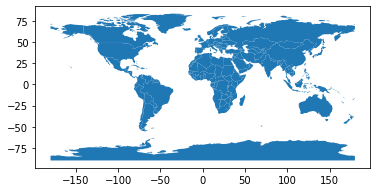

In [13]:
paises.plot()

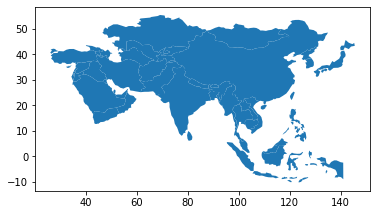

In [14]:
paises_africa = paises[paises['CONTINENT'] == 'Asia']
paises_africa.plot()

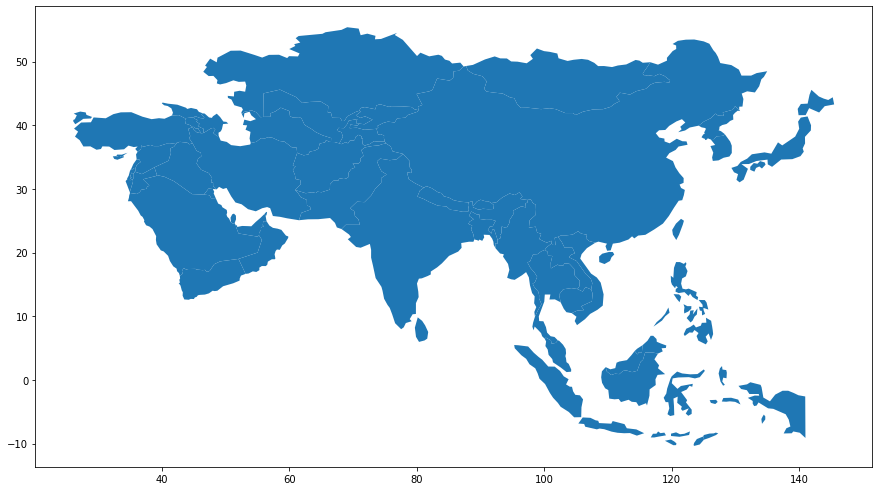

In [15]:
# Cambio de tamaño del mapa
paises_africa.plot(figsize=(15, 10))

#### Visualización de múltiples capas

Para los siguientes ejemplos, deben descargarse los siguientes _shapefiles_ comprimidos en formato ZIP:

- **Ciudades**: [http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/)
- **Ríos**: [http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/](http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/)

Ambas capas deben copiarse en el directorio de datos. Seguidamente, su contenido se almacena en dos GeoDataFrames:

In [16]:
ciudades = geopandas.read_file("zip://./datos/ne_110m_populated_places.zip")
rios = geopandas.read_file("zip://./datos/ne_50m_rivers_lake_centerlines.zip")

Se crea un subconjunto de datos para el continente africano:

In [17]:
paises_africa = paises[paises['CONTINENT'] == 'Africa']

[(-40, 40), (-20, 60)]

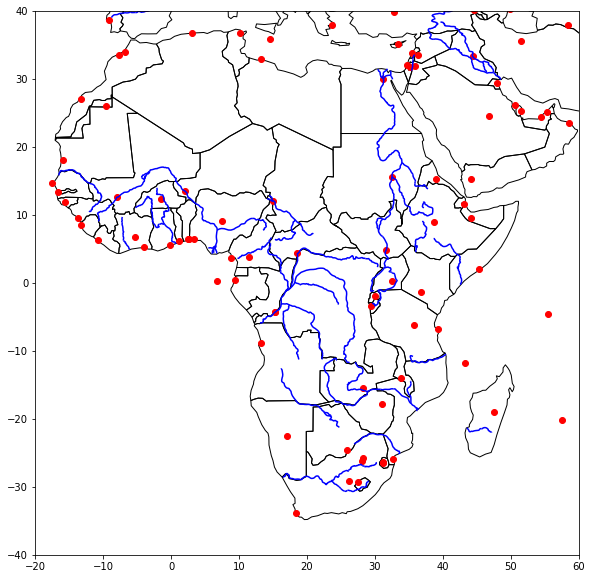

In [18]:
ax = paises.plot(edgecolor='black', facecolor='none', figsize=(15, 10))
rios.plot(ax=ax, color='blue')
ciudades.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

<div class="alert alert-success">
 <strong>Ejercicio</strong>:

Descargue del SNIT las capas de:
* Límite provincial [(http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)](http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)
* Aeródromos y red vial [(http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)](http://www.snitcr.go.cr/servicios_ogc_lista_capas?k=bm9kbzo6MjY=&nombre=IGN%20Cartograf%C3%ADa%201:5mil)

Despliegue las tres capas en un solo mapa.

</div>